####**3) 온라인의존지수**

In [ ]:
#온라인의존지수

In [ ]:
ood=data[['백화점이용금액', '대형할인점이용금액', '소형유통점이용금액','전자상거래이용금액', '배달앱이용금액', '카드소비금액']]
ood

#온라인의존지수에 사용되는 변수들 ood에 저장

,백화점이용금액,대형할인점이용금액,소형유통점이용금액,전자상거래이용금액,배달앱이용금액,카드소비금액
0,449000,4630000,3990000,7151000,956900.00000,194000
1,1433000,509000,6082000,1772000,0.00000,49300
2,330000,1386000,8846000,624000,0.00000,196200
3,1610000,917000,4875000,13938000,407655.00000,154400
4,1010000,7459000,16407000,27662000,1505280.00000,551000
...,...,...,...,...,...,...
434699,1074000,1518000,5433000,1523000,200300.00000,53400
434700,215000,2913000,10644000,3475000,63500.00000,166300
434701,3570000,5150000,9498000,20485000,1961870.00000,231300
434702,5798000,1148000,3735000,4364000,413600.00000,89700


In [ ]:
ood.describe()

,백화점이용금액,대형할인점이용금액,소형유통점이용금액,전자상거래이용금액,배달앱이용금액,카드소비금액
count,434704.00000,434704.00000,434704.00000,434704.00000,434704.00000,434704.00000
mean,2016353.64295,3118758.52764,8481673.72585,11583312.90737,668896.89986,265897.50175
std,5942425.45216,5709881.66506,12848406.02853,21481240.35990,1314587.12997,446611.26221
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,1000.00000,287000.00000,1462000.00000,935000.00000,0.00000,43700.00000
50%,340000.00000,1228000.00000,4298000.00000,4426000.00000,121800.00000,125100.00000
75%,1770000.00000,3609000.00000,10400000.00000,13622000.00000,791600.00000,312100.00000
max,560277429.00000,263636000.00000,462205206.00000,1186662000.00000,40917437.45000,20531200.00000


In [ ]:
offline=data[['백화점이용금액', '대형할인점이용금액', '소형유통점이용금액']]
offline

,백화점이용금액,대형할인점이용금액,소형유통점이용금액
0,449000,4630000,3990000
1,1433000,509000,6082000
2,330000,1386000,8846000
3,1610000,917000,4875000
4,1010000,7459000,16407000
...,...,...,...
434699,1074000,1518000,5433000
434700,215000,2913000,10644000
434701,3570000,5150000,9498000
434702,5798000,1148000,3735000


In [ ]:
online= data[['전자상거래이용금액', '배달앱이용금액']]
online

,전자상거래이용금액,배달앱이용금액
0,7151000,956900.00000
1,1772000,0.00000
2,624000,0.00000
3,13938000,407655.00000
4,27662000,1505280.00000
...,...,...
434699,1523000,200300.00000
434700,3475000,63500.00000
434701,20485000,1961870.00000
434702,4364000,413600.00000


In [ ]:
ood_corr=ood.corr()

<AxesSubplot:>

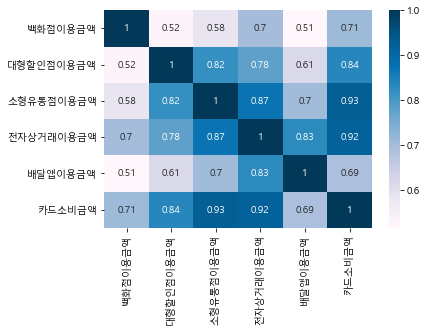

In [ ]:
sns.heatmap(ood_corr, cmap="PuBu", annot=True)

In [ ]:
offline_corr=offline.corr()

<AxesSubplot:>

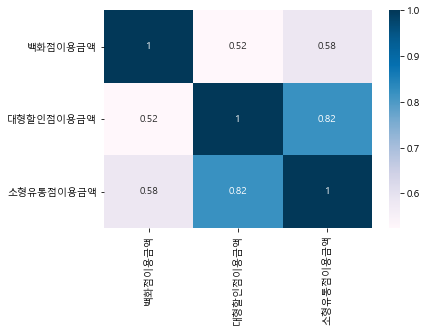

In [ ]:
sns.heatmap(offline_corr, cmap="PuBu", annot=True)

In [ ]:
#StandardScaler 이용하여 오프라인 데이터와 온라인 데이터의 표준화를 진행시켜줌
#각각 표준화 된 항목을 이용하여 전체 온라인 평균(오프라인 평균)을 산출

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(offline)
offline_scaled = scaler.transform(offline)

offline_df_scaled = pd.DataFrame(data=offline_scaled, columns=['백화점이용금액', '대형할인점이용금액', '소형유통점이용금액' ])

In [ ]:
offline_df_scaled

,백화점이용금액,대형할인점이용금액,소형유통점이용금액
0,-0.26376,0.26467,-0.34959
1,-0.09817,-0.45706,-0.18677
2,-0.28378,-0.30347,0.02836
3,-0.06838,-0.38561,-0.28071
4,-0.16935,0.76013,0.61683
...,...,...,...
434699,-0.15858,-0.28035,-0.23728
434700,-0.30313,-0.03604,0.16830
434701,0.26145,0.35574,0.07910
434702,0.63638,-0.34515,-0.36944


In [ ]:
offline_df_scaled['오프라인평균'] = (offline_df_scaled['백화점이용금액']+offline_df_scaled['대형할인점이용금액']+offline_df_scaled['소형유통점이용금액'])/3
offline_df_scaled

,백화점이용금액,대형할인점이용금액,소형유통점이용금액,오프라인평균
0,-0.26376,0.26467,-0.34959,-0.11623
1,-0.09817,-0.45706,-0.18677,-0.24733
2,-0.28378,-0.30347,0.02836,-0.18630
3,-0.06838,-0.38561,-0.28071,-0.24490
4,-0.16935,0.76013,0.61683,0.40254
...,...,...,...,...
434699,-0.15858,-0.28035,-0.23728,-0.22540
434700,-0.30313,-0.03604,0.16830,-0.05696
434701,0.26145,0.35574,0.07910,0.23210
434702,0.63638,-0.34515,-0.36944,-0.02607


In [ ]:
scaler.fit(online)
online_scaled = scaler.transform(online)

online_df_scaled = pd.DataFrame(data=online_scaled, columns=['전자상거래이용금액', '배달앱이용금액' ])

In [ ]:
online_df_scaled

,전자상거래이용금액,배달앱이용금액
0,-0.20633,0.21908
1,-0.45674,-0.50883
2,-0.51018,-0.50883
3,0.10962,-0.19873
4,0.74850,0.63623
...,...,...
434699,-0.46833,-0.35646
434700,-0.37746,-0.46052
434701,0.41439,0.98356
434702,-0.33608,-0.19420


In [ ]:
online_df_scaled ['온라인평균'] = (online_df_scaled ['전자상거래이용금액'] + online_df_scaled ['배달앱이용금액'])/2
online_df_scaled  

,전자상거래이용금액,배달앱이용금액,온라인평균
0,-0.20633,0.21908,0.00637
1,-0.45674,-0.50883,-0.48278
2,-0.51018,-0.50883,-0.50950
3,0.10962,-0.19873,-0.04455
4,0.74850,0.63623,0.69237
...,...,...,...
434699,-0.46833,-0.35646,-0.41240
434700,-0.37746,-0.46052,-0.41899
434701,0.41439,0.98356,0.69898
434702,-0.33608,-0.19420,-0.26514


In [ ]:
result=pd.concat([online_df_scaled['온라인평균'], offline_df_scaled['오프라인평균'] ], axis=1)
result

,온라인평균,오프라인평균
0,0.00637,-0.11623
1,-0.48278,-0.24733
2,-0.50950,-0.18630
3,-0.04455,-0.24490
4,0.69237,0.40254
...,...,...
434699,-0.41240,-0.22540
434700,-0.41899,-0.05696
434701,0.69898,0.23210
434702,-0.26514,-0.02607


In [ ]:
result['온오차'] = result['온라인평균'] - result['오프라인평균']
result     #result dataframe에 온라인평균과 오프라인 평균 그리고 그 차 벨류를 저장

,온라인평균,오프라인평균,온오차
0,0.00637,-0.11623,0.12260
1,-0.48278,-0.24733,-0.23545
2,-0.50950,-0.18630,-0.32321
3,-0.04455,-0.24490,0.20034
4,0.69237,0.40254,0.28983
...,...,...,...
434699,-0.41240,-0.22540,-0.18699
434700,-0.41899,-0.05696,-0.36203
434701,0.69898,0.23210,0.46688
434702,-0.26514,-0.02607,-0.23907


In [ ]:
result.describe()

,온라인평균,오프라인평균,온오차
count,434704.00000,434704.00000,434704.00000
mean,0.00000,-0.00000,-0.00000
std,0.95616,0.87270,0.53057
min,-0.52403,-0.51522,-21.75486
25%,-0.49595,-0.44003,-0.15608
50%,-0.34933,-0.27688,-0.02951
75%,0.10028,0.09818,0.10285
max,42.56976,46.03483,11.39033


In [ ]:
result.sort_values('온오차').head(100)

,온라인평균,오프라인평균,온오차
341851,12.42211,34.17697,-21.75486
317748,17.31044,38.63616,-21.32572
426424,21.31578,42.40647,-21.09069
425622,29.26081,46.03483,-16.77401
209072,17.43163,33.90802,-16.47639
...,...,...,...
395166,0.33136,6.07834,-5.74698
425632,9.18097,14.90954,-5.72856
316935,0.94195,6.64682,-5.70487
16076,1.06141,6.75385,-5.69244
